In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
file_path = './Bigdata/unscaled_data.xlsx'
df = pd.read_excel(file_path)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('PATIENT_ID',axis=1,inplace=True)

binary_cols = df.columns[df.nunique() == 2].tolist()
numeric_cols = df.columns[df.nunique()!=2].tolist()
# 用KNN填充数据 k=5
imputer = KNNImputer(n_neighbors=5)  # 假设选择 5 个最近邻
df_complete_knn = imputer.fit_transform(df)
col = df.columns.tolist()
df = pd.DataFrame(df_complete_knn, columns=col)
for col in binary_cols:
    # 判断值不等于0或1的情况，然后按比例修改值
    df[col] = df[col].apply(lambda x: 1 if x > 1/2 else (0 if x < 1/2 else x))

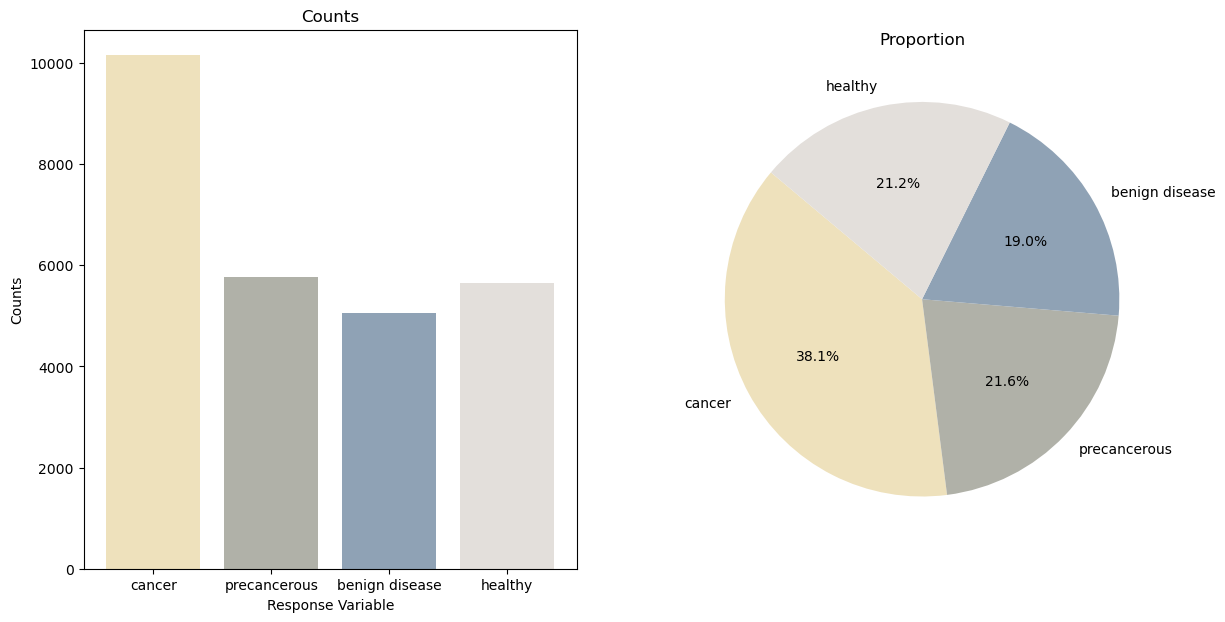

In [40]:
import os
file_path = './Bigdata/figure/balance.pdf'
directory = os.path.dirname(file_path)
# 创建两个子图：一个柱状图和一个饼图
res_columns = ['癌','癌前病变','良性疾病','健康或非结肠疾病']
df_count =df[res_columns]
df_count.columns  = ["cancer",'precancerous','benign disease','healthy']
counts = df_count.sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))



morandi_colors = ['#EEE1BC','#B0B1A8','#8FA2B5','#E3DFDB','#EEEBB8']

# 柱状图
ax1.bar(counts.index, counts, color=morandi_colors[:len(counts)])
ax1.set_title('Counts')
ax1.set_xlabel('Response Variable')
ax1.set_ylabel('Counts')

# 饼图
ax2.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=morandi_colors)
ax2.set_title('Proportion')
# 显示图表
plt.savefig(file_path, format='pdf', bbox_inches='tight')
plt.show()


,cancer,precancerous lesion,benign disease,healthy or non-colonic disease
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
26611,0,0,1,0
26612,0,0,1,0
26613,0,0,0,1
26614,1,0,0,0
